In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl

Text(0, 0.5, 'V')

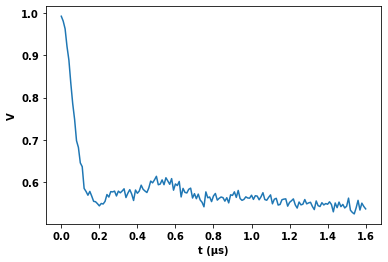

In [2]:
loaded_data = np.genfromtxt("../../data/2g_Pid-1388_Sid-14056.dat", skip_header = 1, delimiter = ',')
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')

In [3]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}
model = dive.model(t, Vexp, pars)

In [4]:
MCMCparameters = {"draws": 10000,"tune": 4000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 2964 seconds.
There were 1456 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6857786127373448, but should be close to 0.8. Try to increase the number of tuning steps.
There were 562 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1068 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6473 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.25164860692343444, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.019,0.018,0.000,0.045,0.005,0.003,22.0,123.0,1.12
λ,0.414,0.025,0.366,0.445,0.009,0.007,14.0,6.0,1.21
V₀,0.977,0.022,0.941,1.013,0.007,0.005,14.0,6.0,1.20
σ,0.033,0.010,0.019,0.051,0.000,0.000,575.0,861.0,1.13
δ,18300.725,11609.217,1640.095,38468.786,531.064,375.748,277.0,746.0,1.03
lg(α),0.596,0.091,0.419,0.763,0.009,0.006,198.0,25.0,1.09


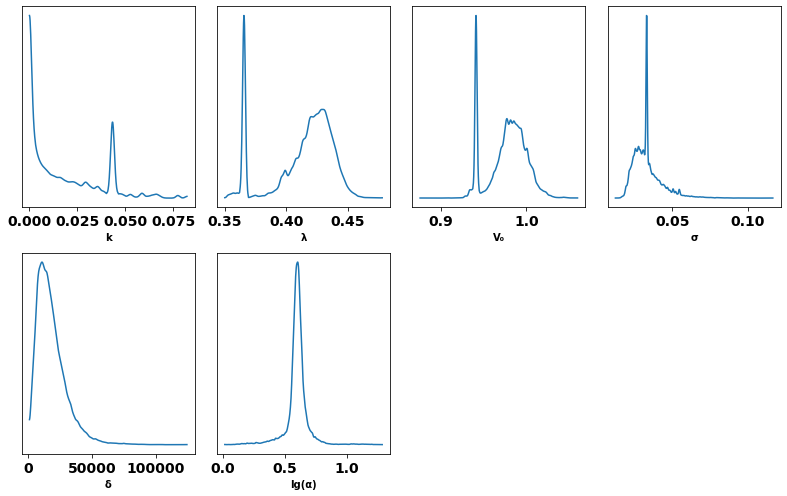

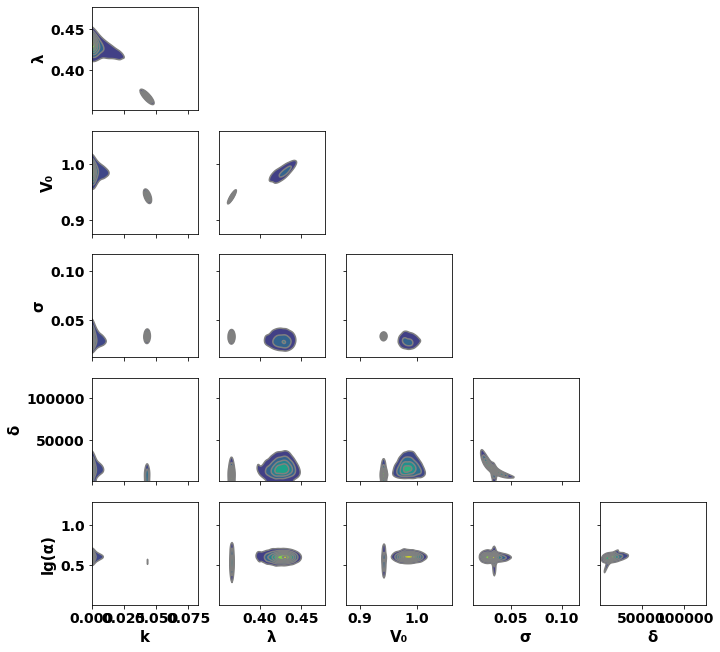

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


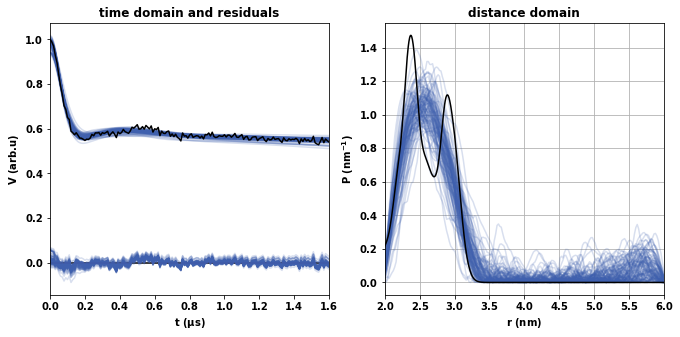

In [5]:
dive.summary(trace, model, Pid = 1388)  